# Dimensionality Reduction Sprint Challenge

A powerful method for dimensionality reduction is using Principal Components Analysis (PCA).

Students should be able to complete objectives after this sprint:
* Identify the use case for normalization
* Graph the top two dimensions of a high dimensional dataset with PCA
* Compute the eigenvectors and eigenvalues of a dataset

Lets use the UCI Wine Dataset for this Sprint  Challenge: It is high dimensional, numeric, and clean - an excellent opportunity for PCA.

[UCI Wine Data Set](http://archive.ics.uci.edu/ml/datasets/Wine)

The UCI License forbids redistributing their data. We can link directly to it!

[UCI Wine Data Set Data](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

In [0]:
# Download the data to your colab instance!
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data -O wine.data

--2018-05-12 04:06:32--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [text/plain]
Saving to: ‘wine.data’

wine.data           100%[===================>]  10.53K  --.-KB/s    in 0s      

2018-05-12 04:06:32 (269 MB/s) - ‘wine.data’ saved [10782/10782]



In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('wine.data')

# Column names from:
# http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names
columns = ['vinyard','alcohol','malic acid','ash','ash alcalinity','magnesium',
           'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
           'Color intensity','Hue','dilute OD280/OD315', 'Proline']

data.columns = columns

vinyard = data['vinyard']
data = data.drop(['vinyard'],axis=1)
colors = np.array(['red','green','blue'])[np.array([vinyard])-1]

# 1. Identify the use case for normalization

Principal Components Analysis will give us a view into our data that maximizes its variance, potentially improving intuition and learning algorithms. Look at the below `data.std()` output. If we use PCA to project the wine dataset onto the 3 dimensions with the highest variance, which ones will they be? How will this projection differ than simply plotting the three dimensions directly?

Highest variance dimensions are 'Proline', 'magnesium', and 'ash alcalinity'. This projection will differ from a 3D plot in that a projection is based on all of the data.

alcohol                   0.808808
malic acid                1.119314
ash                       0.275080
ash alcalinity            3.336071
magnesium                14.174018
Total phenols             0.626465
Flavanoids                0.998658
Nonflavanoid phenols      0.124653
Proanthocyanins           0.571545
Color intensity           2.324446
Hue                       0.229135
dilute OD280/OD315        0.705103
Proline                 314.884046
dtype: float64


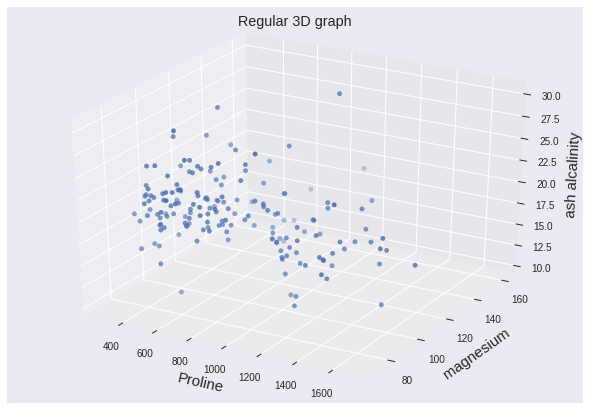

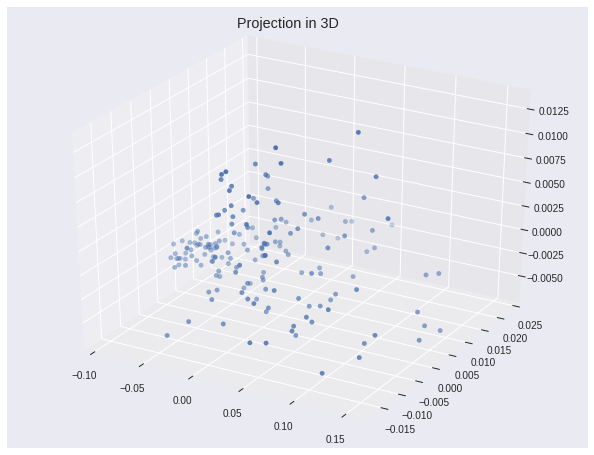

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

print(data.std())
cols = data[['Proline', 'magnesium', 'ash alcalinity']]

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(*cols.values.T);
ax.set_xlabel('Proline', fontsize = 15, labelpad=10)
ax.set_ylabel('magnesium', fontsize = 15, labelpad=10)
ax.set_zlabel('ash alcalinity', fontsize = 15, labelpad=10);
plt.suptitle('Regular 3D graph')

model = PCA(n_components=3)
vals = normalize(data.values)
model.fit(vals)
X_3D = model.transform(vals)
xx, xy, xz = X_3D.T

fig2 = plt.figure(figsize = (10.4, 7))
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xx, xy, xz);
plt.suptitle('Projection in 3D')
fig2.subplots_adjust(top=1)

# 2. Graph the top two dimensions of a high dimensional dataset using PCA

Use PCA with 2 components to plot the top two dimensions of this dataset. Apply the color vector above so that the origin of each sample is visible.

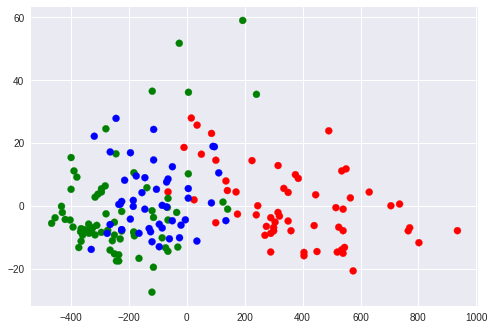

In [0]:
# Use PCA and make a graph of data

model = PCA(n_components=2)
model.fit(pts2)

x,y = model.transform(pts2).T
plt.scatter(x, y, color = colors.tolist()[0]);


# 3. Graph the top two dimensions of a normalized high dimensional dataset using PCA

Use a `normalization` from `scikit.preprocessing` to improve the results of the PCA.

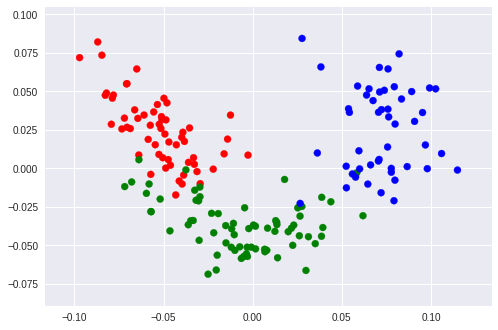

In [0]:
from sklearn import preprocessing

model2 = PCA(n_components=2)
pts2 = normalize(data.values, axis=0)
model2.fit(pts2)

x,y = model2.transform(pts2).T
plt.scatter(x, y, color = colors.tolist()[0]);


# 4. Compute the eigenvectors of a dataset

What are the top-two eigenvectors of the above un-normalized dataset?

In [0]:
# evec = the top two eigenvectors of the UCI Wine dataset, un-normalized

evec = model.components_[:2]
print(evec)

[[ 0.11952718  0.02485542  0.02283696  0.23293668  0.94767179  0.02006328
   0.01733545  0.00396477  0.01440108  0.02394668  0.00983231  0.0258343
  -0.17311533]
 [-0.2582931  -0.11249743 -0.06421034 -0.91278349  0.25988983 -0.02973999
  -0.0165819  -0.01882074 -0.02235519 -0.09800225 -0.00849647 -0.05179892
  -0.03763578]]


# 5. Compute the eigenvalues of a dataset

What are the top-two eigenvalues of the above un-normalized dataset?

In [0]:
# eval = the top two eigenvalues of the UCI Wine dataset, un-normalized

eval = model.singular_values_[:2]
print(eval)

[0.75801287 0.08852738]
